In [1]:
%pylab inline

import math
import matplotlib.pyplot as plt 
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score


plt.style.use('ggplot')
pylab.rcParams['figure.figsize'] = (5.0, 5.0)
data = pd.read_excel("combined.xls")

Populating the interactive namespace from numpy and matplotlib


# About this project

There is a lot of misinformation about guns in the media coming from both sides of the aisle. It's hard to get unbiased information from any one source - but luckily for us, data doesn't lie.

I have taken it upon myself to collect data from multiple sources and compile it in one place, so that we can do a comprehensive analysis and take a look at the *facts*.

I will not pretend to be unbiased about this issue - but I have tried to present the data in an unbiased manner, and since all of the data and code used to analyze it is freely available, I invite you to look at it yourself.

Before we get to the graphs and data, lets go over some definitions.

* Automatic weapon: The firearm will continue to fire bullets as long as the trigger is depressed.
* Semi-automatic weapon: The firearm will fire one bullet per pull of the trigger. By far the most popular kind of the weapon in the United States, and most likely, the world.
* Assault weapon: a rather nebulous term used by the media to describe AR-15 style rifles. In military parlance, an assault rifle is a "select-fire" weapon, meaning it can switch between fully automatic and semi-automatic rates of fire. AR-15s, as purchasable by US citizens, are not "select-fire", as they only fire in semi-automatic mode.

All analyses are performed on data that is publically available, from reputable sources - typically government agencies, or the World Bank. Where I believe the sources are more spurious, I will tell you.

## Gun Crime in the United States

Both gun homicides, and general homicides have experienced steep declines since 1995. Rates of gun homicides dropped 50% from the high of 1995 to the low of 2014, and have only slightly rebounded since then, mirroring the overall homicide trend in the United States.

There has been a [lot](https://www.vox.com/policy-and-politics/2018/2/21/17028930/gun-violence-us-statistics-charts) of [talk](https://www.npr.org/2016/01/05/462017461/guns-in-america-by-the-numbers) about the increasing number of guns owned by civilians in the United States. Several of these pieces draw a direct link between the number of guns, and rates of gun homicides, even going so far as to suggest that more guns = more gun homicides.

The data suggests otherwise.


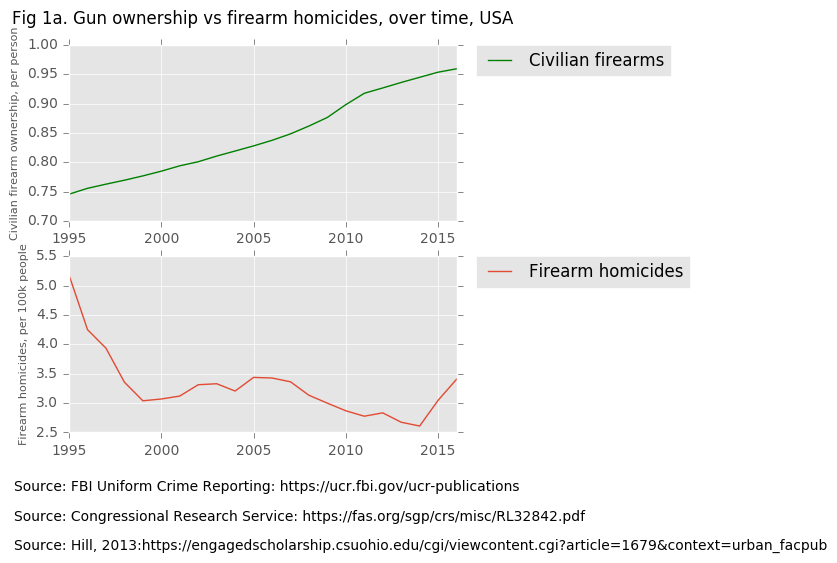

In [20]:
plt.subplot(211)
plt.plot(data['year'], data['usa.guns.rate'], 'g-', label='Civilian firearms')
plt.ylabel('Civilian firearm ownership, per person', fontsize=8)
plt.title("Fig 1a. Gun ownership vs firearm homicides, over time, USA", fontsize=12, y=1.08)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlim(1995, 2016)
plt.subplot(212)
plt.plot(data['year'], data['usa.homicide.firearms.total'], label='Firearm homicides')
plt.ylabel('Firearm homicides, per 100k people', fontsize=8)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlim(1995, 2016)
plt.text(1992, 1.5, "Source: FBI Uniform Crime Reporting: https://ucr.fbi.gov/ucr-publications")
plt.text(1992, 1, "Source: Congressional Research Service: https://fas.org/sgp/crs/misc/RL32842.pdf")
plt.text(1992, 0.5, "Source: Hill, 2013:https://engagedscholarship.csuohio.edu/cgi/viewcontent.cgi?article=1679&context=urban_facpub")
plt.show()

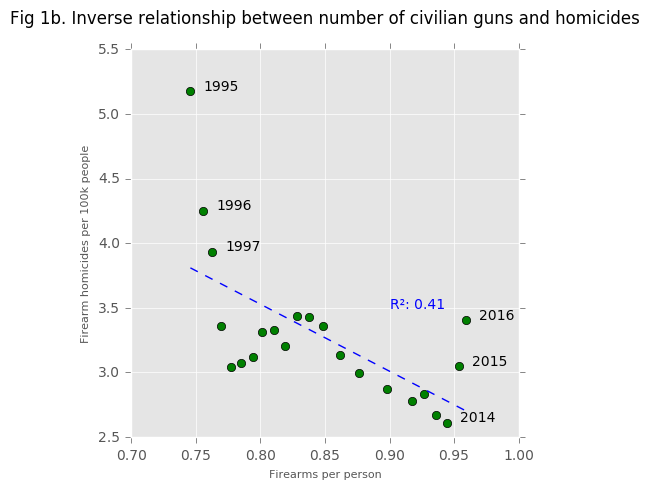

In [21]:
x = data['usa.guns.rate']
y = data['usa.homicide.firearms.total']
z = data['year']
regr = linear_model.LinearRegression()
fit = regr.fit(x.reshape(-1, 1), y.reshape(-1, 1))
y_pred = regr.predict(x.reshape(-1, 1))

plt.plot(x, y, 'go')
plt.plot(x, y_pred, 'b--')
plt.title("Fig 1b. Inverse relationship between number of civilian guns and homicides", fontsize=12, y=1.05)
plt.ylabel("Firearm homicides per 100k people", fontsize=8)
plt.xlabel("Firearms per person", fontsize=8)

# annotate r-squared value
plt.text(0.9, 3.5, 'R²: {0}'.format(regr.score(x.reshape(-1,1), y.reshape(-1,1)).round(2)), color='blue')
# annotate first and last three years
for i in [0, 1, 2, len(x)-3, len(x)-2, len(x)-1]:
    plt.text(x[i] + 0.01, y[i] + 0.01, z[i])
plt.show()

## Are assault weapons really that deadly?

The rate of rifle homicides (including so-called "assault rifles") has dropped even quicker than general homicide rate. Despite all of the furor raised over civilian ownership of "assault rifles", less than 400 people have been killed with rifles (hunting, military, semiautomatic, etc) for the last 10 years.

The answer seems to be no. The overwhelming majority of homicides committed with firearms involve handguns.

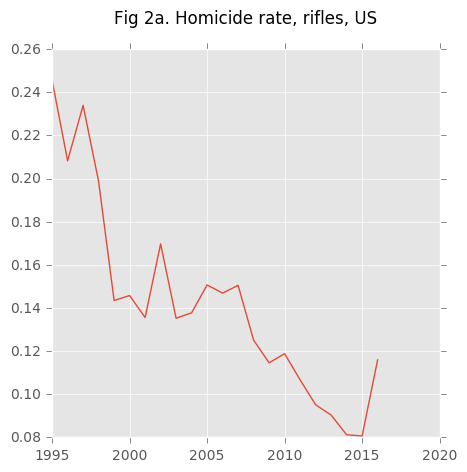

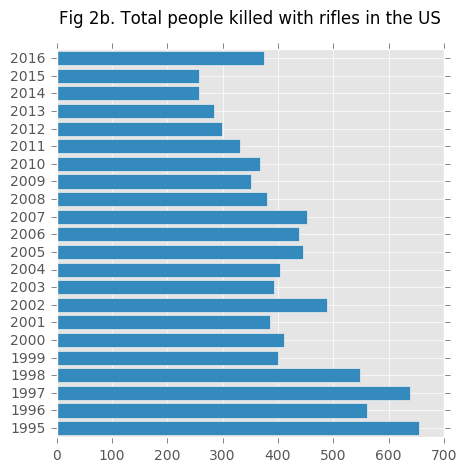

In [46]:
plt.plot(data['year'], data['usa.homicide.firearms.rifles'])
plt.title('Fig 2a. Homicide rate, rifles, US', fontsize=12, y=1.05)
plt.show()

pos = np.arange(len(data['year'])) + .5
bars = plt.barh(pos, data['usa.fbi.firearms.rifles'], align='center')
plt.title('Fig 2b. Total people killed with rifles in the US', fontsize=12, y=1.05)
plt.yticks(pos, data['year'], fontsize=10)
plt.ylim(0, len(data['year']))
plt.show()

## Mass Shootings

Data on mass shootings was collected from [Mother Jones US Mass Shooting Database](https://www.motherjones.com/politics/2012/12/mass-shootings-mother-jones-full-data/)

Mother Jones used the following criteria were used to define a mass shooting:
* The perpetrator took the lives of at least three people. 
* The killings were carried out by a lone shooter. (Except in the case of the Columbine massacre and the Westside Middle School killings, which involved two shooters.)
* The shootings occurred in a public place. (Except in the case of a party on private property in Crandon, Wisconsin, and another in Seattle, where crowds of strangers had gathered.) Crimes primarily related to gang activity or armed robbery are not included, nor are mass killings that took place in private homes (often stemming from domestic violence).
* Perpetrators who died or were wounded during the attack are not included in the victim counts.
* "Spree Killings": more than one location over a short period of time, that otherwise fit the above criteria.

___There have been only 97 mass shootings in the United States since 1982___

Processing on data was performed, with the following categorical terms lumped under semi-automatic rifles:
* Semi-automatic/semiautomatic rifle
* AR-15
* Assault rifle

Data on firearm homicides was collected from the [FBI Uniform Crime Reporting page](https://ucr.fbi.gov/ucr-publications)

I have selected the years since 1995 for this case study, since reliable data for some statistics tends to be harder to find for years prior to that (FBI crime reports, World Bank development indicators, homicide data, etc). 1996 was also the year that the Australian ban on semi-automatic weapons was implemented.


#### Semi-automatic rifle use in mass shootings

In the last 23 years (since 1995), there have been a total of 21 instances of mass shootings involving the use of semi-automatic rifles (also called "assault" rifles).  
In those 21 cases, a total of 229 people were killed. 160 (69%, expected: 19%) of those fatalities came from just four mass shootings:  

1. Las Vegas, 2017: 58
2. Orlando nightclub, 2016: 49
3. Sandy Hook, 2012: 27
4. Texas First Baptist, 2017: 26

#### Semi-automatic handgun use in mass shootings

Interestingly, in the same time span there have been 36 instances of mass shootings where only semi-automatic handguns were used.  
In these cases, a total of 267 people were killed. 85 (25%, expected: 11%) of those fatalities came from four mass shootings:  

1. Virginia Tech, 2007: 32
2. Killeen, Texas, 1996: 24
3. USPS, 1986: 15
4. Binghamton, 2009: 14

### Are mass shootings increasing in frequency?

Looking at the data, there is an increase in the number of victims of mass shootings, and the percentage of gun homicides from mass shootings. However, this increase is relatively small (accounting for approximately 0.5% of gun homicides), and is significantly smaller than the increase in defensive gun use by citizens

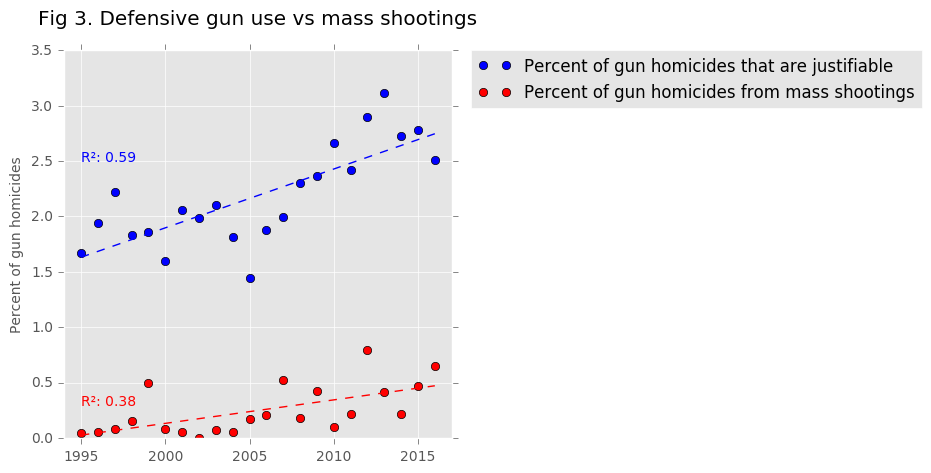

In [47]:
x = data['year']
y = data['usa.mass_shootings.fatalities'] / data['usa.fbi.firearms.total'] * 100
z = data['usa.justifiable.firearms.total']  / data['usa.fbi.firearms.total'] * 100



regr = linear_model.LinearRegression()
fit = regr.fit(x.reshape(-1,1), z.reshape(-1,1))
z_pred = regr.predict(x.reshape(-1, 1))
plt.plot(x, z, 'bo', label='Percent of gun homicides that are justifiable')
plt.plot(x, z_pred, 'b--')
plt.text(1995, 2.5, 'R²: {0}'.format(regr.score(x.reshape(-1,1), z.reshape(-1,1)).round(2)), color='blue')

regr = linear_model.LinearRegression()
fit = regr.fit(x.reshape(-1,1), y.reshape(-1,1))
y_pred = regr.predict(x.reshape(-1, 1))
plt.plot(x, y, 'ro', label='Percent of gun homicides from mass shootings')
plt.plot(x, y_pred, 'r--')
plt.text(1995, 0.3, 'R²: {0}'.format(regr.score(x.reshape(-1,1), y.reshape(-1,1)).round(2)), color='red')

plt.title('Fig 3. Defensive gun use vs mass shootings', y=1.05)
plt.ylabel('Percent of gun homicides', fontsize=10)
plt.xlim(1994, 2017)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()
